In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [29]:
start ='2012-01-01'
end = '2022-12-21'
stock ='GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [30]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [31]:
data.reset_index(inplace =True)

In [32]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [33]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [34]:
data.dropna(inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2761 non-null   datetime64[ns]
 1   Open       2761 non-null   float64       
 2   High       2761 non-null   float64       
 3   Low        2761 non-null   float64       
 4   Close      2761 non-null   float64       
 5   Adj Close  2761 non-null   float64       
 6   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


In [36]:
movavg_100_days = data.Close.rolling(100).mean()

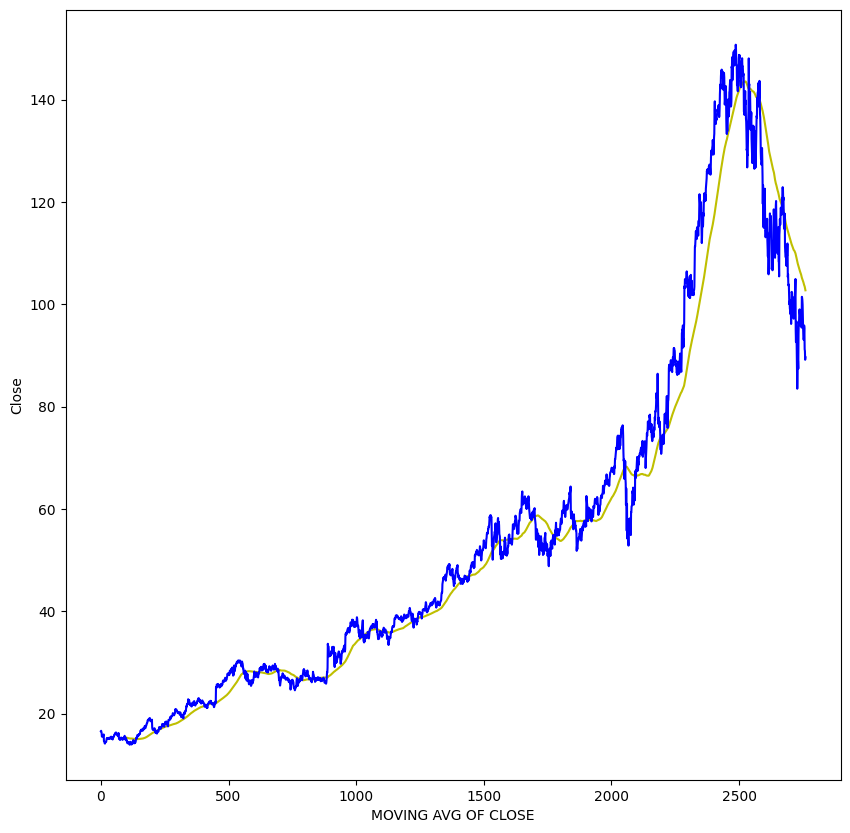

In [37]:
plt.figure(figsize=(10,10))
plt.plot(movavg_100_days,'y')
plt.plot(data.Close,'b')
plt.xlabel('MOVING AVG OF CLOSE')
plt.ylabel('Close')
plt.show()


In [38]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [39]:
data_train.shape[0]

2208

In [40]:
data_test.shape[0]

553

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [43]:
data_train_scale = sc.fit_transform(data_train)

In [44]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [45]:
x,y = np.array(x),np.array(y)

In [69]:

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# from keras.layers import Dense, Dropout,  LSTM
# from keras.models import Sequential

In [75]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [76]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.compile(optimizer='adam', loss='mse')


AttributeError: module 'keras.src.backend' has no attribute 'Variable'

In [68]:
model.fit(x,
          y,
          epochs=50,
          batch_size=32,
          verbose=1)


Epoch 1/50
66/66 [==============================] - 24s 283ms/step - loss: 0.0350
Epoch 2/50
66/66 [==============================] - 23s 349ms/step - loss: 0.0066
Epoch 3/50
66/66 [==============================] - 18s 273ms/step - loss: 0.0061
Epoch 4/50
66/66 [==============================] - 17s 256ms/step - loss: 0.0055
Epoch 5/50
66/66 [==============================] - 17s 256ms/step - loss: 0.0049
Epoch 6/50
66/66 [==============================] - 18s 270ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0045
Epoch 8/50
66/66 [==============================] - 18s 272ms/step - loss: 0.0046
Epoch 9/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0041
Epoch 10/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0041
Epoch 11/50
66/66 [==============================] - 18s 272ms/step - loss: 0.0046
Epoch 12/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0038
Epoch 13/50
6

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_7 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_8 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [74]:
data_test.head()

,Close
2208,78.457497
2209,78.584000
2210,78.403999
2211,77.956497
2212,78.650497


In [75]:
data_train.tail(100)

,Close
2108,70.335999
2109,70.139999
2110,70.521004
2111,70.850998
2112,70.891998
...,...
2203,74.301003
2204,72.671997
2205,73.014503
2206,74.296501


In [81]:
past_100_days_of_train_data = data_tarin.tail(100)

In [86]:
data_test = data_test.append(past_100_days_of_train_data, ignore_index=True)


<ipython-input-86-3418bf1c6124>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test = data_test.append(past_100_days_of_train_data, ignore_index=True)


In [90]:
data_test_scale = sc.fit_transform(data_test)

In [91]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [92]:
y_pred = model.predict(x)

18/18 [==============================] - 2s 72ms/step


In [93]:
y_pred

array([[0.4308896 ],
       [0.42954752],
       [0.42845106],
       [0.42761314],
       [0.42724413],
       [0.4273541 ],
       [0.4278561 ],
       [0.42874444],
       [0.42996955],
       [0.43121895],
       [0.43219367],
       [0.43269807],
       [0.4327134 ],
       [0.43228263],
       [0.43149626],
       [0.4304427 ],
       [0.4292544 ],
       [0.42806086],
       [0.4270091 ],
       [0.4264838 ],
       [0.42734176],
       [0.4305584 ],
       [0.43723863],
       [0.4479005 ],
       [0.4623684 ],
       [0.47898927],
       [0.4957941 ],
       [0.51071095],
       [0.5229701 ],
       [0.5323834 ],
       [0.53916186],
       [0.5435709 ],
       [0.5459692 ],
       [0.5464457 ],
       [0.54585564],
       [0.54523176],
       [0.5450957 ],
       [0.5467303 ],
       [0.55161405],
       [0.5601668 ],
       [0.5715016 ],
       [0.5832974 ],
       [0.5934441 ],
       [0.60106087],
       [0.60627127],
       [0.608534  ],
       [0.60732496],
       [0.602

In [94]:
sc.scale_

array([0.01208985])

In [96]:
scale=1/sc.scale_

In [98]:
y_pred= y_pred*scale

In [99]:
y=y*scale

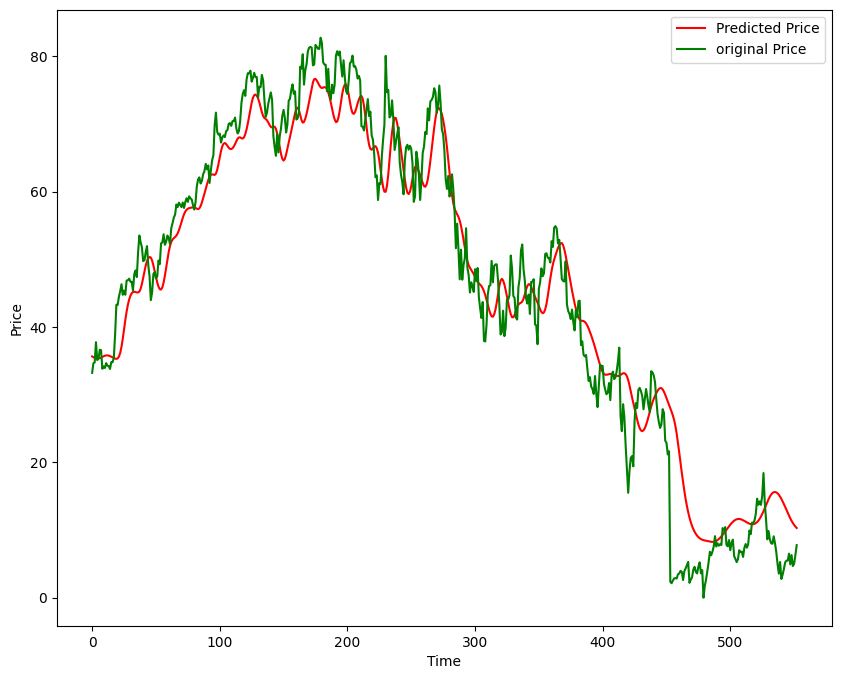

In [101]:
plt.figure(figsize=(10,8))
plt.plot(y_pred,'r',label='Predicted Price')
plt.plot(y,'g',label='original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [102]:
model.save('Stock market predictions model.keras')